In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
passenger_crosstab = pd.crosstab(titanic['class'], titanic['alive'], margins=True)

passenger_crosstab.columns = ['Died', 'Survived', 'All']

print(passenger_crosstab)

        Died  Survived  All
class                      
First     80       136  216
Second    97        87  184
Third    372       119  491
All      549       342  891


## Accurate Visualizations

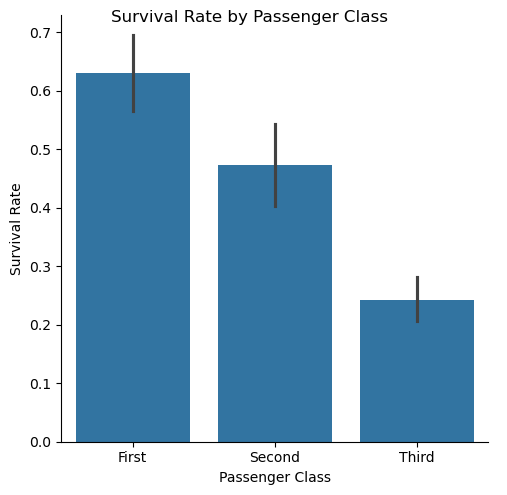

In [44]:
p = sns.catplot(data=titanic, x="class", y="survived", kind="bar")
p.fig.suptitle("Survival Rate by Passenger Class")  
p.set_axis_labels("Passenger Class", "Survival Rate")
plt.show()

 - This plot accurately shows the proportion of passengers in each class who survived the titanic disaster. It's effective because it tells the truth - it doesn't omit any information or mislead viewers with a distorted scale or baseline. Using this figure, we can see that there is a class disparity in survival rates for titanic passengers, with over 60% of first class passengers surviving while only about 25% of third class passengers survived.

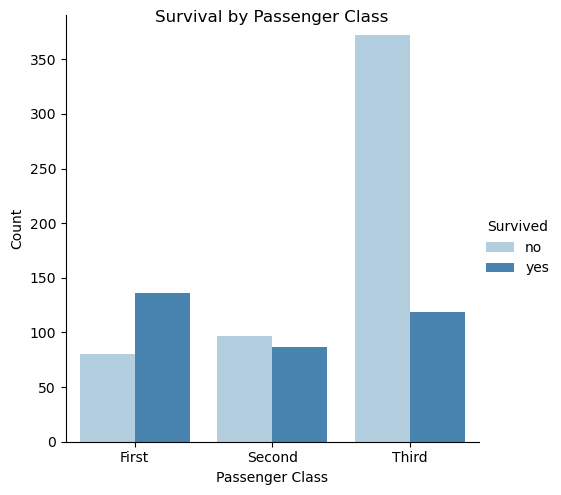

In [32]:
p = sns.catplot(data=titanic, x="class", hue="alive", kind="count", palette='Blues')

p.fig.suptitle("Survival by Passenger Class")  
p.set_axis_labels("Passenger Class", "Count")
p._legend.set_title("Survived") 

plt.show()

 - This figure shows a count of passengers who lived or died in the titanic disaster. It is an accurate representation of the data including all data points. We can see that although similar numbers of passengers survived in each passenger class, there were many more deaths among third class passengers.

## Misleading Visualizations

In [14]:
survivors = titanic[titanic['survived']==1]

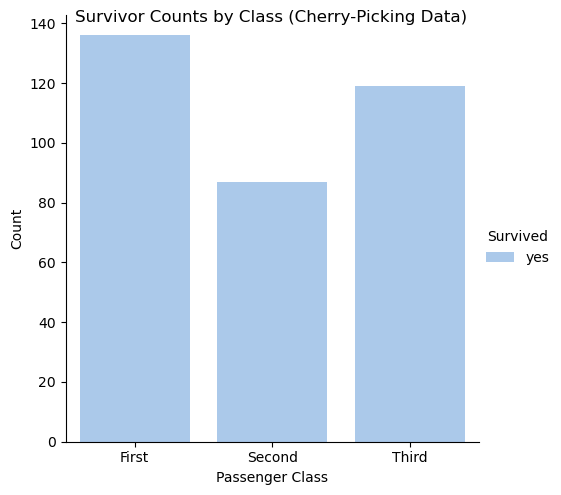

In [46]:
p = sns.catplot(data=survivors, x="class", hue='alive', kind="count", palette='pastel')
p.fig.suptitle("Survivor Counts by Class (Cherry-Picking Data)")  
p.set_axis_labels("Passenger Class", "Count")
p._legend.set_title("Survived")
plt.show()

 - This figure shows the number of passengers in each class that survived the titanic disaster. It is misleading because it only includes the survivors, while excluding passengers that died - cherry-picking the data. This visualization could lead a reader to conclude that there were minimal differences in survivorship between the passenger classes, or even that third class passengers had a greater chance of survival than second class. Not pictured here are the counts of passengers who died: 372 third class passengers, 90 second class passengers, and 80 first class passengers.

/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/1791541921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic.groupby('class')['survived'].mean().reset_index()
/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/1791541921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate, y='survived', x='class', palette='pastel')


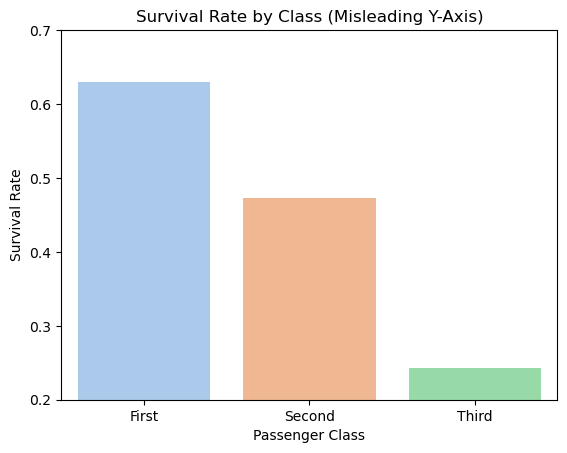

In [48]:
survival_rate = titanic.groupby('class')['survived'].mean().reset_index()

sns.barplot(data=survival_rate, y='survived', x='class', palette='pastel')

# truncate the y-axis to exaggerate differences
plt.ylim(0.2, 0.7)  

plt.title("Survival Rate by Class (Misleading Y-Axis)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

plt.show()

 - This figure shows the survival rate by passenger class, but it has a misleading truncated y-axis starting at 0.2 and ending at 0.7. This makes it appear as though there are larger differences in survival rates than there actually are. It looks like basically none of the third class passengers survived, while almost all of the first class passengers did. 

/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/1113014510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_data = titanic.groupby('class')['survived'].agg(['sum', 'mean']).reset_index()


ValueError: Automatic legend placement (loc='best') not implemented for figure legend

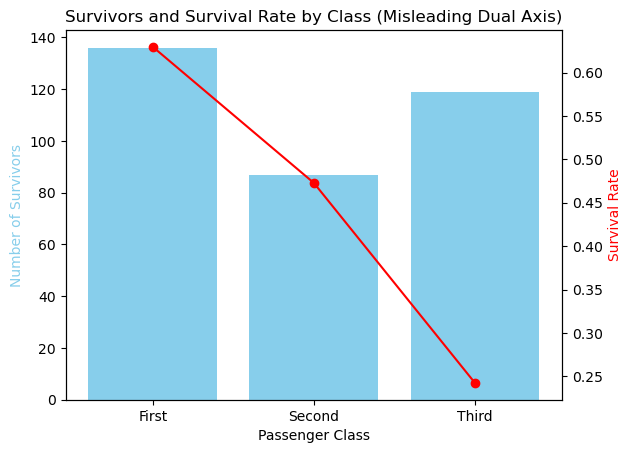

In [57]:
survival_data = titanic.groupby('class')['survived'].agg(['sum', 'mean']).reset_index()

fig, ax1 = plt.subplots()

# bar plot for the number of survivors
ax1.bar(survival_data['class'], survival_data['sum'], color='skyblue', label='Survivors')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Survivors', color='skyblue')

# create second y-axis
ax2 = ax1.twinx()
ax2.plot(survival_data['class'], survival_data['mean'], color='red', marker='o', label='Survival Rate')
ax2.set_ylabel('Survival Rate', color='red')

plt.title("Survivors and Survival Rate by Class (Misleading Dual Axis)")
fig.legend(loc="upper ")
plt.show()

 - This figure simultaneously shows the survival counts and survival rate for the passengers by class. It is a poor visualization because it is confusing and possibly misleading. It uses two different y-axes with different scales to display the two statistics, with a count of survivors on the left, and the survival rate on the right. If it is not read very carefully, a reader could conclude that the bars represent survival rate as well as count. This would result in the erroneous conclusion that 45-65% of passengers survived in every class. This information is better shown in separate figures for clarity.